### Problem 1
- Start with the file pricers.py that I provided in class. Add to the module a function titled naive_monte_carlo_pricer that implements the naive Monte Carlo method to price European calls and puts. Use the class VanillaOption to pass a first argument option to the pricer.
- Make sure the pricer function returns a namedtuple that contains the estimated price and the standard error. This might look something like this:
- See the jupyter notebook titled Namedtuple-Hints.ipynb for help with this.
- Price European call and put options where ST = $41.0, K = $40.0, r = 8%, σ = 30%, δ = 0.0, T = 1.0 using your new pricer function.
- Create a markdown table that presents the number of repititions, the estimated price and the standard error for M = 1000, 10000, 25000, 50000, 750000, and 100000 where M is the number of repitions in the Monte Carlo simulations.


In [1]:
import numpy as np
import pandas as pd
from option import VanillaOption, call_payoff, put_payoff
from pricers import european_binomial, naive_monte_carlo_pricer, antithetic_monte_carlo_pricer,  stratified_monte_carlo_pricer

In [2]:
final_table = {}
final_table['Type of Monte Carlo'] = []
final_table['Type of Option'] = []
final_table['Reps'] = []
final_table['Price'] = []
final_table['Stderr'] = []

In [3]:
spot = 41.0
strike = 40.0
rate = 0.08
vol = 0.30
div = 0.0
expiry = 1.0

In [4]:
reps = [1000,10000,25000,50000,75000,100000]

In [5]:
the_call = VanillaOption(strike, expiry, call_payoff)
for i in range(len(reps)):
    monte_call = naive_monte_carlo_pricer(the_call, spot, rate, vol, div, reps[i])
    final_table['Type of Monte Carlo'].append('Naive')
    final_table['Type of Option'].append('Euro Call')
    final_table['Reps'].append(reps[i])
    final_table['Price'].append(monte_call.price)
    final_table['Stderr'].append(monte_call.stderr)

In [6]:
the_put = VanillaOption(strike, expiry, put_payoff)
for i in range(len(reps)):
    monte_put = naive_monte_carlo_pricer(the_put, spot, rate, vol, div, reps[i])
    final_table['Type of Monte Carlo'].append('Naive')
    final_table['Type of Option'].append('Euro Put')
    final_table['Reps'].append(reps[i])
    final_table['Price'].append(monte_put.price)
    final_table['Stderr'].append(monte_put.stderr)

### Problem 2
- Write another new pricer function titled antithetic_monte_carlo_pricer that implements the antithetic variance reduction technique.
- Reprice the call and puts above and reproduce and add to the table a comparison of the naive Monte Carlo results with the antithetic sampling results. Is there a reduction in the standard error?

In [7]:
the_call = VanillaOption(strike, expiry, call_payoff)
for i in range(len(reps)):
    anti_call = antithetic_monte_carlo_pricer(the_call, spot, rate, vol, div, reps[i])
    final_table['Type of Monte Carlo'].append('Antithetic')
    final_table['Type of Option'].append('Euro Call')
    final_table['Reps'].append(reps[i])
    final_table['Price'].append(anti_call.price)
    final_table['Stderr'].append(anti_call.stderr)

In [8]:
the_put = VanillaOption(strike, expiry, put_payoff)
for i in range(len(reps)):
    anti_put = antithetic_monte_carlo_pricer(the_put, spot, rate, vol, div, reps[i])
    final_table['Type of Monte Carlo'].append('Antithetic')
    final_table['Type of Option'].append('Euro Put')
    final_table['Reps'].append(reps[i])
    final_table['Price'].append(anti_put.price)
    final_table['Stderr'].append(anti_put.stderr)

### Problem 3
- Write another new pricer function titled stratified_monte_carlo_pricer that implements the stratified sampling variance reduction technique.
- Add the new results to the table. Now compare naive Monte Carlo, antithetic Monte Carlo, and stratified Monte Carlo. What do you notice?


In [9]:
the_call = VanillaOption(strike, expiry, call_payoff)
for i in range(len(reps)):
    strat_call = stratified_monte_carlo_pricer(the_call, spot, rate, vol, div, reps[i])
    final_table['Type of Monte Carlo'].append('Stratified')
    final_table['Type of Option'].append('Euro Call')
    final_table['Reps'].append(reps[i])
    final_table['Price'].append(strat_call.price)
    final_table['Stderr'].append(strat_call.stderr)
    
final = pd.DataFrame(final_table)

In [10]:
the_put = VanillaOption(strike, expiry, put_payoff)
for i in range(len(reps)):
    strat_put = stratified_monte_carlo_pricer(the_put, spot, rate, vol, div, reps[i])
    final_table['Type of Monte Carlo'].append('Stratified')
    final_table['Type of Option'].append('Euro Put')
    final_table['Reps'].append(reps[i])
    final_table['Price'].append(strat_put.price)
    final_table['Stderr'].append(strat_put.stderr)
    


In [149]:
final = pd.DataFrame(final_table)
final = final.set_index(final.columns[0])
final
#final_calls.plot('Reps', 'Stderr', kind = 'bar')
#final.groupby(['Type of Monte Carlo']).mean().drop(['Reps','Price'], axis=1)

,Type of Option,Reps,Price,Stderr
Type of Monte Carlo,,,,
Naive,Euro Call,1000,7.251885,0.338252
Naive,Euro Call,10000,6.918878,0.104860
Naive,Euro Call,25000,7.064438,0.068555
Naive,Euro Call,50000,6.958498,0.047708
Naive,Euro Call,75000,6.943353,0.038815
Naive,Euro Call,100000,6.985581,0.034008
Naive,Euro Put,1000,2.751330,0.153175
Naive,Euro Put,10000,2.855658,0.048798
Naive,Euro Put,25000,2.865053,0.031055


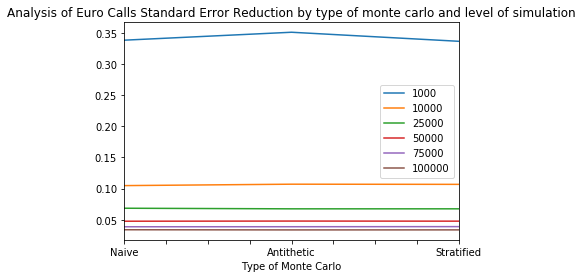

In [146]:
final_calls = final['Type of Option'] == 'Euro Call'
final_calls = final[final_calls]
final_calls
final_calls.sort_values(['Reps'])

final_0 = final_calls['Reps'] == reps[0]
final_0 = final_calls[final_0]
final_0 = final_0.reset_index()

final_1 = final_calls['Reps'] == reps[1]
final_1 = final_calls[final_1]
final_1 = final_1.reset_index()

final_2 = final_calls['Reps'] == reps[2]
final_2 = final_calls[final_2]
final_2 = final_2.reset_index()

final_3 = final_calls['Reps'] == reps[3]
final_3 = final_calls[final_3]
final_3 = final_3.reset_index()

final_4 = final_calls['Reps'] == reps[4]
final_4 = final_calls[final_4]
final_4 = final_4.reset_index()

final_5 = final_calls['Reps'] == reps[5]
final_5 = final_calls[final_5]
final_5 = final_5.reset_index()

ax = final_0.plot('Type of Monte Carlo','Stderr',label = reps[0], title = 'Analysis of Euro Calls Standard Error Reduction by type of monte carlo and level of simulation')
final_1.plot('Type of Monte Carlo','Stderr', ax=ax, label = reps[1])
final_2.plot('Type of Monte Carlo','Stderr', ax=ax, label = reps[2])
final_3.plot('Type of Monte Carlo','Stderr', ax=ax, label = reps[3])
final_4.plot('Type of Monte Carlo','Stderr', ax=ax, label = reps[4])
final_5.plot('Type of Monte Carlo','Stderr', ax=ax, label = reps[5])

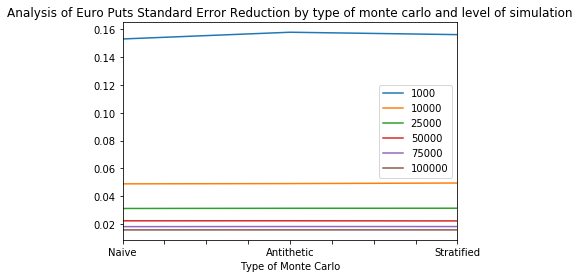

In [147]:
final_Puts = final['Type of Option'] == 'Euro Put'
final_Puts = final[final_Puts]
final_Puts
final_Puts.sort_values(['Reps'])

final_0 = final_Puts['Reps'] == reps[0]
final_0 = final_Puts[final_0]
final_0 = final_0.reset_index()

final_1 = final_Puts['Reps'] == reps[1]
final_1 = final_Puts[final_1]
final_1 = final_1.reset_index()

final_2 = final_Puts['Reps'] == reps[2]
final_2 = final_Puts[final_2]
final_2 = final_2.reset_index()

final_3 = final_Puts['Reps'] == reps[3]
final_3 = final_Puts[final_3]
final_3 = final_3.reset_index()

final_4 = final_Puts['Reps'] == reps[4]
final_4 = final_Puts[final_4]
final_4 = final_4.reset_index()

final_5 = final_Puts['Reps'] == reps[5]
final_5 = final_Puts[final_5]
final_5 = final_5.reset_index()

ax = final_0.plot('Type of Monte Carlo','Stderr',label = reps[0], title = 'Analysis of Euro Puts Standard Error Reduction by type of monte carlo and level of simulation')
final_1.plot('Type of Monte Carlo','Stderr', ax=ax, label = reps[1])
final_2.plot('Type of Monte Carlo','Stderr', ax=ax, label = reps[2])
final_3.plot('Type of Monte Carlo','Stderr', ax=ax, label = reps[3])
final_4.plot('Type of Monte Carlo','Stderr', ax=ax, label = reps[4])
final_5.plot('Type of Monte Carlo','Stderr', ax=ax, label = reps[5])

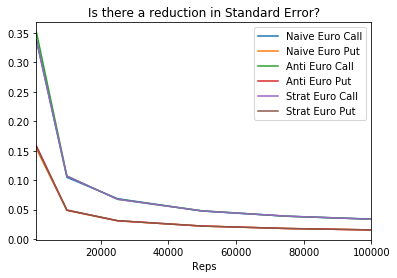

In [148]:
Naive = final[final.index == 'Naive']
Naive_Euro = Naive.set_index(Naive.columns[0])
Naive_call = Naive_Euro[Naive_Euro.index == 'Euro Call']
Naive_put = Naive_Euro[Naive_Euro.index == 'Euro Put']

Anti = final[final.index == 'Antithetic']
Anti_Euro = Anti.set_index(Anti.columns[0])
Anti_call = Anti_Euro[Anti_Euro.index == 'Euro Call']
Anti_put = Anti_Euro[Anti_Euro.index == 'Euro Put']

Strat = final[final.index == 'Stratified']
Strat_Euro = Strat.set_index(Anti.columns[0])
Strat_call = Strat_Euro[Strat_Euro.index == 'Euro Call']
Strat_put = Strat_Euro[Strat_Euro.index == 'Euro Put']



ax = Naive_call.plot('Reps', 'Stderr', label = "Naive Euro Call", title = 'Is there a reduction in Standard Error?')
Naive_put.plot('Reps', 'Stderr',ax=ax, label = 'Naive Euro Put')
Anti_call.plot('Reps', 'Stderr',ax=ax, label = 'Anti Euro Call')
Anti_put.plot('Reps', 'Stderr',ax=ax, label = 'Anti Euro Put')
Strat_call.plot('Reps', 'Stderr',ax=ax, label = 'Strat Euro Call')
Strat_put.plot('Reps', 'Stderr',ax=ax, label = 'Strat Euro Put')



The increase of repitions has the largest impact on reducing the standard error for both euro calls and puts. As for which type (naive, antithetic or stratified) -- they are relatively close. It seems as though the stratified method is the most efficient from of reducing the standard error as it performs the best with the smallest amount of repitions; therefore, saving computational power. 